# **Klasifikasi Negara Berdasarkan Indikator Sosial Pendapatan dan Harapan Hidup untuk Optimalisasi Distribusi Bantuan HELP International**

# Reading Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Baca data dan pra proses data
df_country = pd.read_csv('Data_Negara_HELP.csv')
df_country = df_country.set_index('Negara')
df = df_country.astype('float')
df

# Menampilkan 5 data teratas
print(df.head())

# Menampilkan informasi tentang datasetnya
print(df.info())

# Statistik deskriptif
print(df.describe())

                     Kematian_anak  Ekspor  Kesehatan  Impor  Pendapatan  \
Negara                                                                     
Afghanistan                   90.2    10.0       7.58   44.9      1610.0   
Albania                       16.6    28.0       6.55   48.6      9930.0   
Algeria                       27.3    38.4       4.17   31.4     12900.0   
Angola                       119.0    62.3       2.85   42.9      5900.0   
Antigua and Barbuda           10.3    45.5       6.03   58.9     19100.0   

                     Inflasi  Harapan_hidup  Jumlah_fertiliti  GDPperkapita  
Negara                                                                       
Afghanistan             9.44           56.2              5.82         553.0  
Albania                 4.49           76.3              1.65        4090.0  
Algeria                16.10           76.5              2.89        4460.0  
Angola                 22.40           60.1              6.16        3530.0  

In [ ]:
# Cek missing values
df.isna().sum()

Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

# Exploratory Data Analysis (EDA)

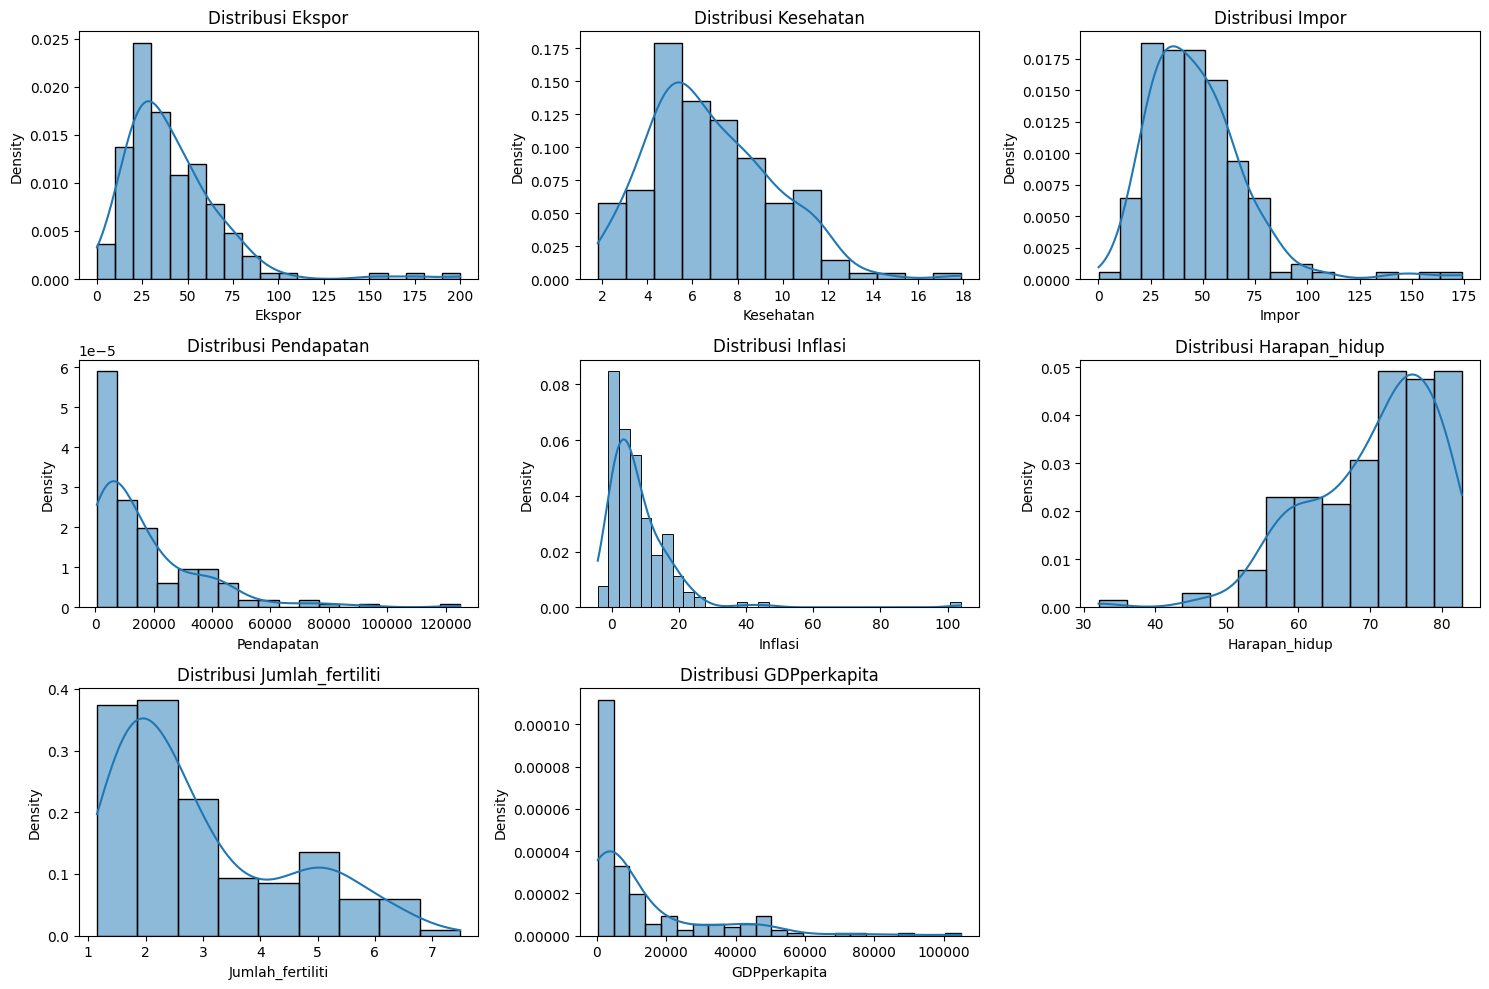

In [ ]:
# Visualisasi histogram untuk setiap variable (Univariate Analysis)
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[1:]):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True, stat='density')
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()


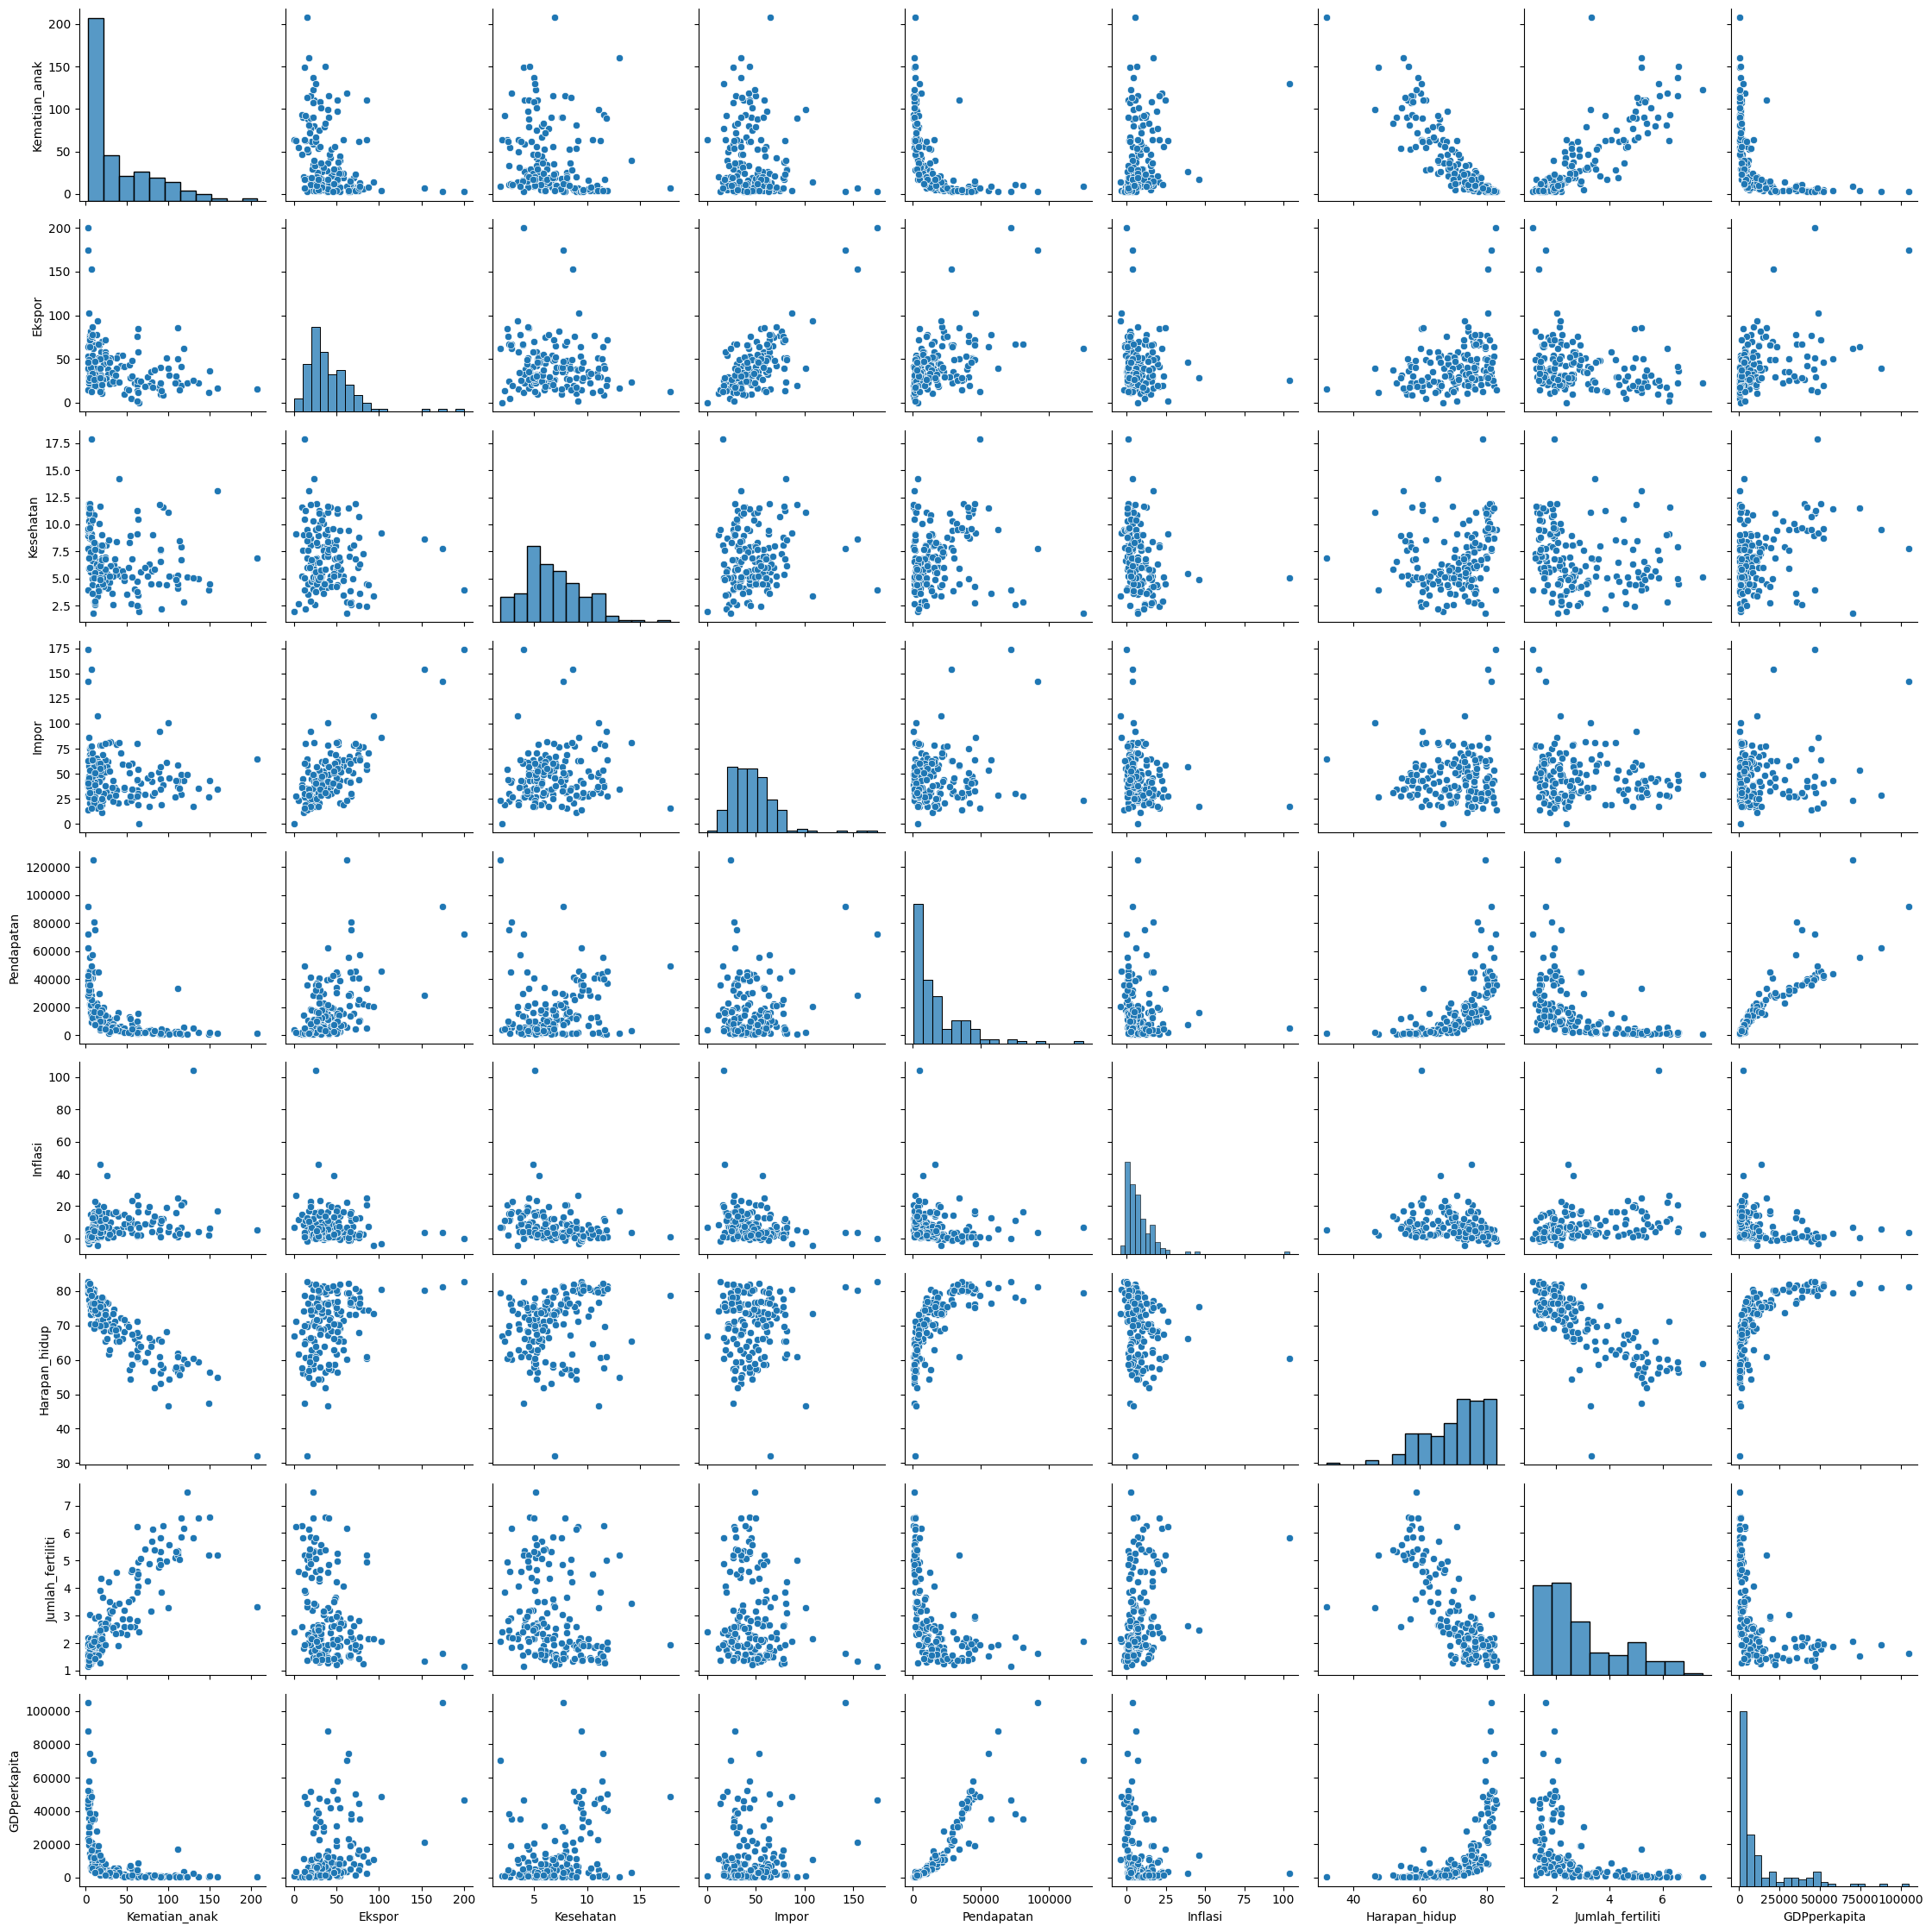

In [ ]:
# Multivariate Analysis (Hubungan antara 2 variable atau fitur)
sns.pairplot(df)
plt.tight_layout()
plt.show()

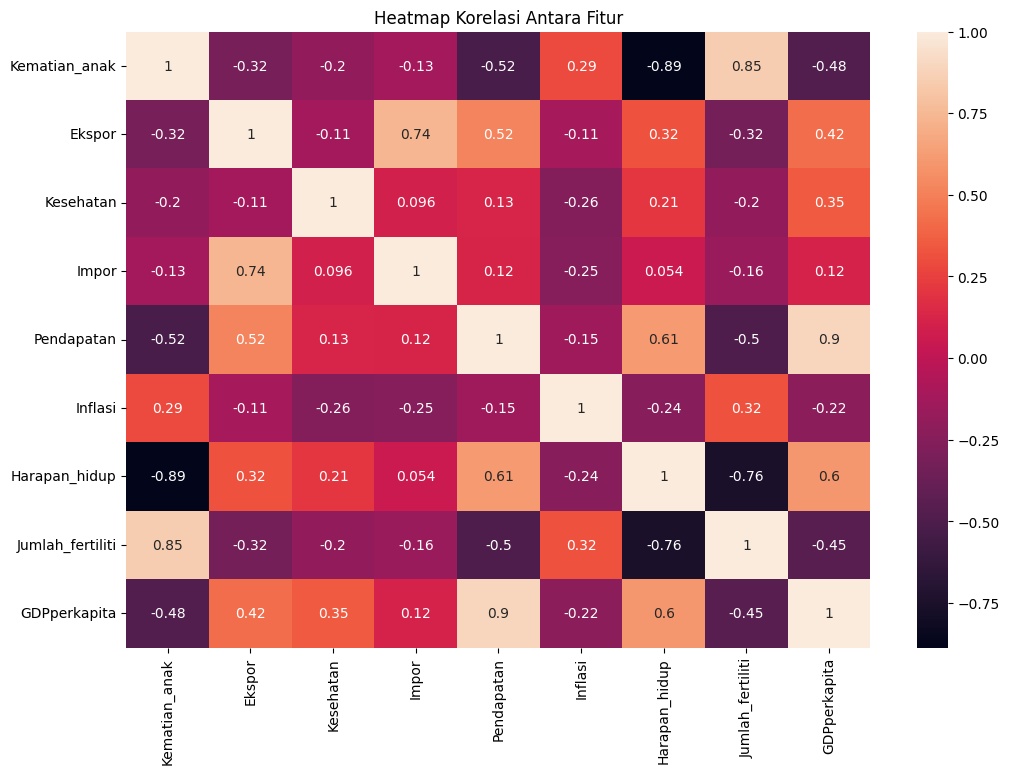

In [ ]:
# Bivariate Analysis
# Matrix korelasi
correlation = df.corr()

# Heatmap untuk visualisasi korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, fmt='.2g')
plt.title('Heatmap Korelasi Antara Fitur')
plt.show()


# Handling Outliers

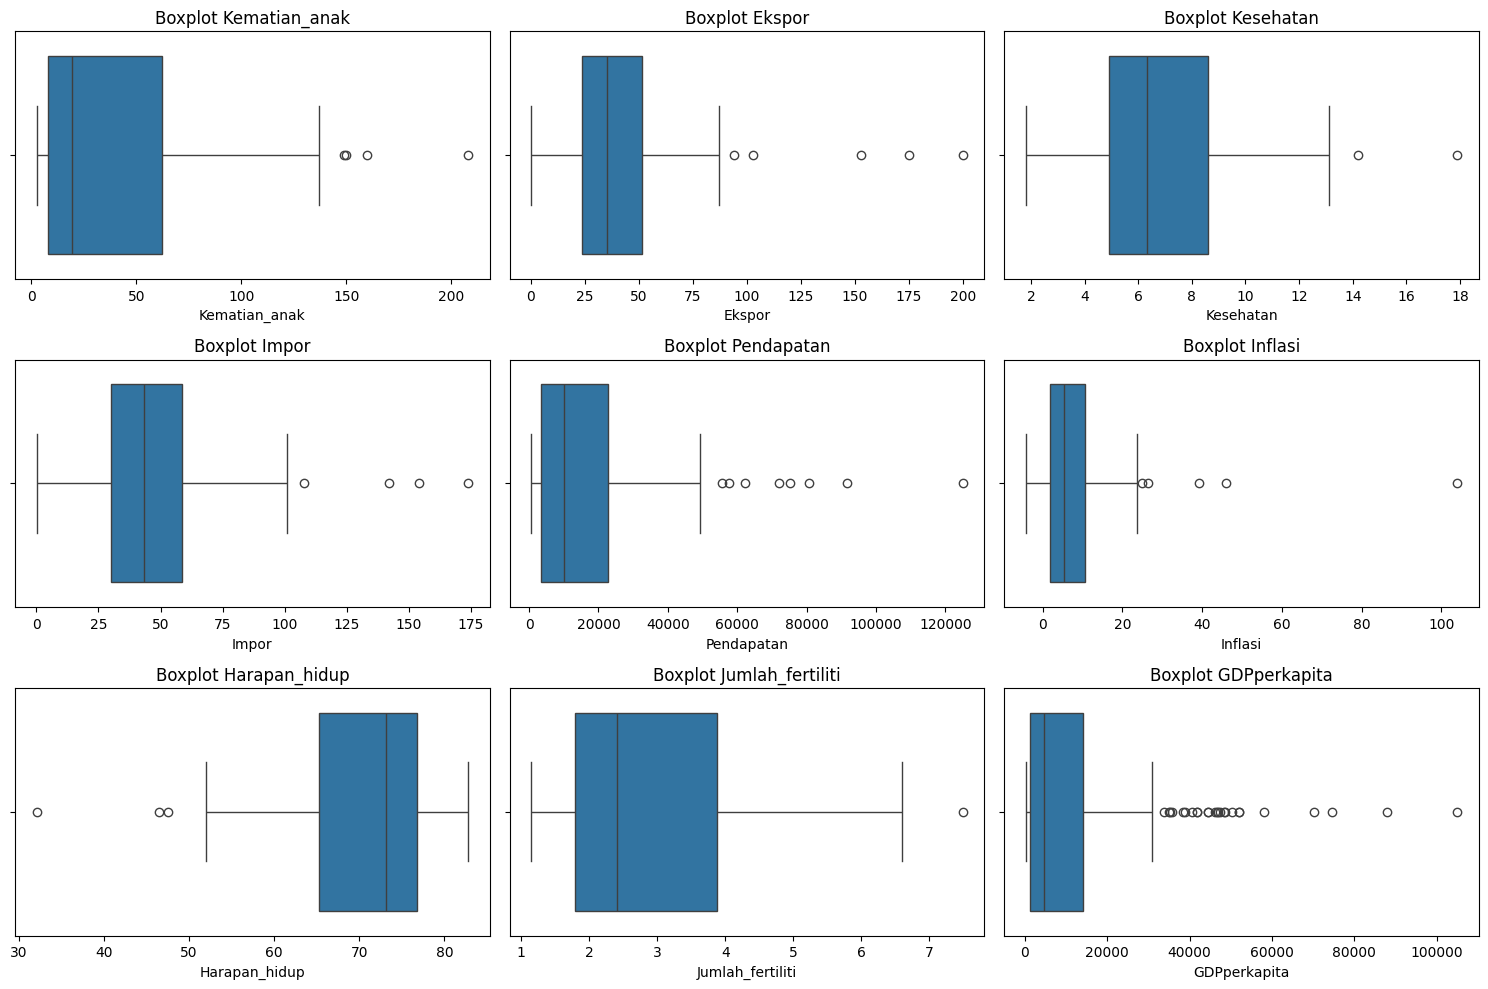

In [ ]:
# Menentukan kolom numerik
numeric_columns = df.select_dtypes(include=[float, int]).columns

# Membuat subplot untuk setiap kolom
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot {column}')
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
# Handling with winsorization
# Tentukan batas winsorization
q1_pendapatan = df['Pendapatan'].quantile(0.05)
q3_pendapatan = df['Pendapatan'].quantile(0.95)
q1_gdp = df['GDPperkapita'].quantile(0.05)
q3_gdp = df['GDPperkapita'].quantile(0.95)
q1_harapan_hidup = df['Harapan_hidup'].quantile(0.05)
q3_harapan_hidup = df['Harapan_hidup'].quantile(0.95)

# Terapkan winsorization
df['Pendapatan'] = np.where(df['Pendapatan'] < q1_pendapatan, q1_pendapatan, df['Pendapatan'])
df['Pendapatan'] = np.where(df['Pendapatan'] > q3_pendapatan, q3_pendapatan, df['Pendapatan'])
df['GDPperkapita'] = np.where(df['GDPperkapita'] < q1_gdp, q1_gdp, df['GDPperkapita'])
df['GDPperkapita'] = np.where(df['GDPperkapita'] > q3_gdp, q3_gdp, df['GDPperkapita'])
df['Harapan_hidup'] = np.where(df['Harapan_hidup'] < q1_harapan_hidup, q1_harapan_hidup, df['Harapan_hidup'])
df['Harapan_hidup'] = np.where(df['Harapan_hidup'] > q3_harapan_hidup, q3_harapan_hidup, df['Harapan_hidup'])

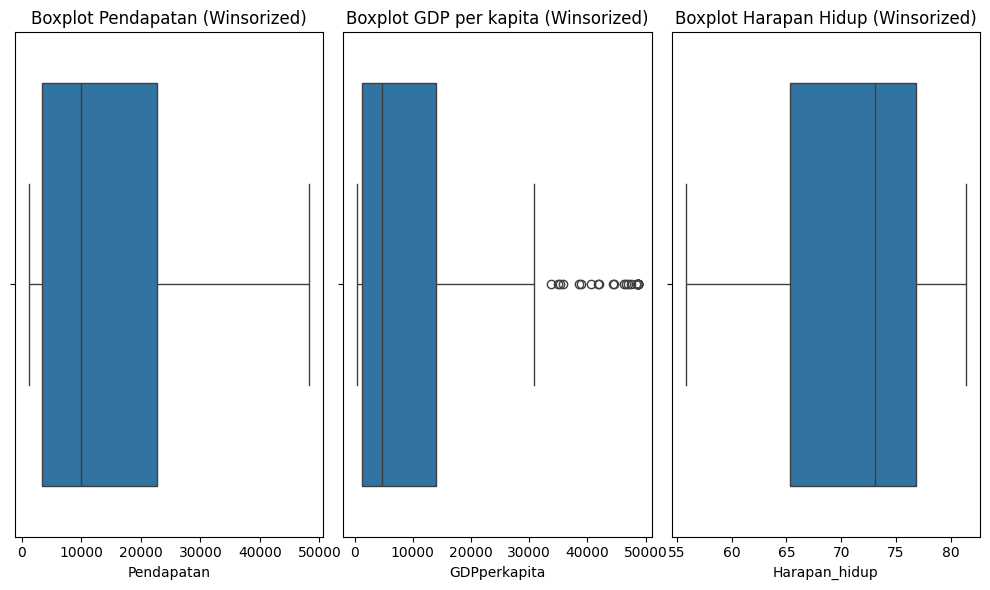

In [ ]:
## Mengatur ukuran canvas untuk subplot
plt.figure(figsize=(10, 6))

# Membuat subplot untuk setiap kolom yang diwinsorisasi
plt.subplot(1, 3, 1)
sns.boxplot(x=df['Pendapatan'])
plt.title('Boxplot Pendapatan (Winsorized)')

plt.subplot(1, 3, 2)
sns.boxplot(x=df['GDPperkapita'])
plt.title('Boxplot GDP per kapita (Winsorized)')

plt.subplot(1, 3, 3)
sns.boxplot(x=df['Harapan_hidup'])
plt.title('Boxplot Harapan Hidup (Winsorized)')

plt.tight_layout()
plt.show()

# Scaling Data

In [ ]:
# Inisialisasi objek StandardScaler
scaler = StandardScaler()

# Melakukan scaling data
scaled_data = scaler.fit_transform(df)

# Membuat DataFrame baru dari data yang telah discaling
df_scaled = pd.DataFrame(scaled_data, columns=df.columns)
df_scaled

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,1.291532,-1.138280,0.279088,-0.082455,-0.960575,0.157336,-1.825310,1.902882,-0.757874
1,-0.538949,-0.479658,-0.097016,0.070837,-0.395590,-0.312347,0.682454,-0.859973,-0.523775
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.193907,0.789274,0.707406,-0.038404,-0.499286
3,2.007808,0.775381,-1.448071,-0.165315,-0.669255,1.387054,-1.338729,2.128151,-0.560839
4,-0.695634,0.160668,-0.286894,0.497568,0.227115,-0.601749,0.744836,-0.541946,0.012991
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.869580,-0.489784,-0.976912,0.365754,-0.597903
163,-0.526514,-0.461363,-0.695862,-1.213499,0.050557,3.616865,0.570166,-0.316678,0.099032
164,-0.372315,1.130305,0.008877,1.380030,-0.765003,0.409732,0.283208,-0.661206,-0.707771
165,0.448417,-0.406478,-0.597272,-0.517472,-0.765683,1.500916,-0.415473,1.140944,-0.707771


# Clustering KMeans dan Visualisasinya

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

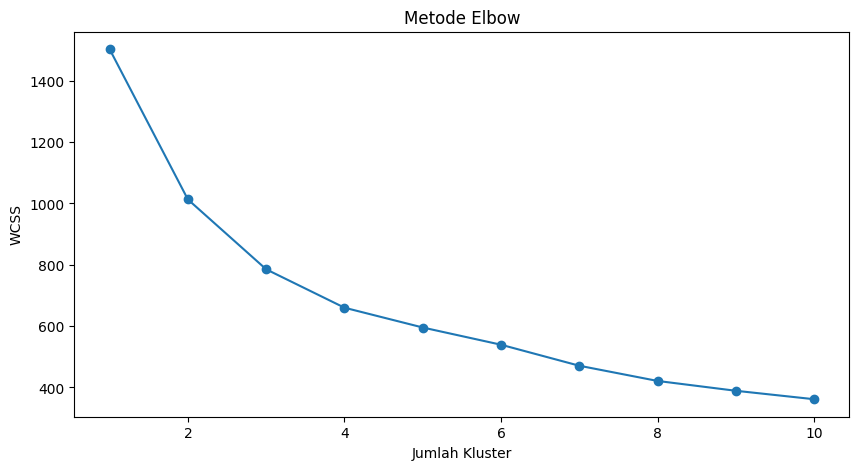

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


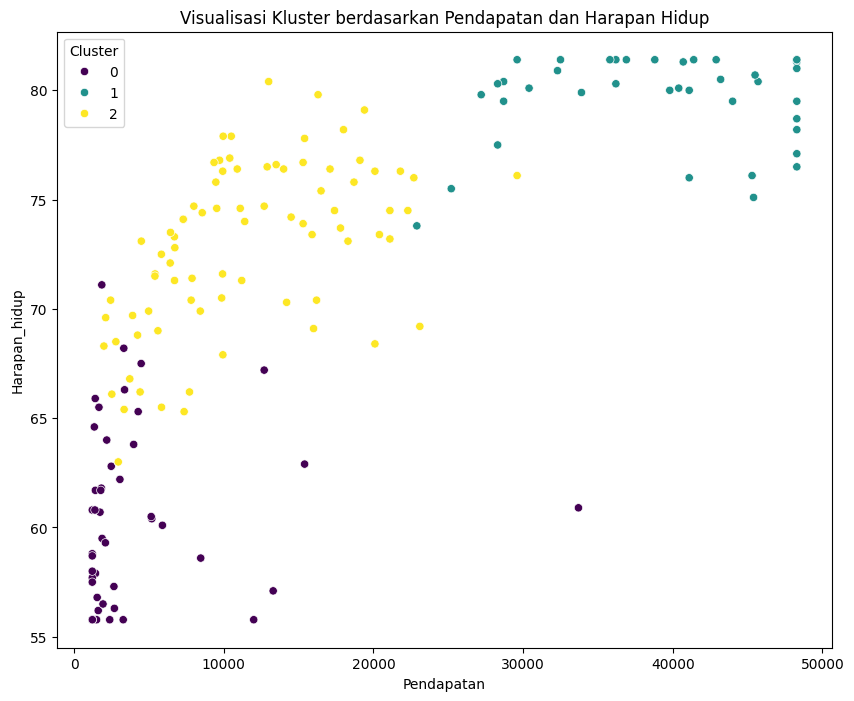

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Menentukan jumlah kluster optimal menggunakan metode Elbow
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Metode Elbow')
plt.xlabel('Jumlah Kluster')
plt.ylabel('WCSS')
plt.show()

# Membuat KMeans dengan jumlah kluster optimal (misalnya, kita pilih 3)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

# Menambahkan kolom kluster ke dalam data asli
df['Cluster'] = clusters

# Visualisasi kluster menggunakan dua fitur sebagai contoh
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Pendapatan', y='Harapan_hidup', hue='Cluster', data=df, palette='viridis')
plt.title('Visualisasi Kluster berdasarkan Pendapatan dan Harapan Hidup')
plt.show()


# Filtering Negara

In [ ]:
# Menampilkan negara dalam setiap kluster dari yang terendah ke tertinggi
bottom_countries_cluster = {}
for cluster in range(3):
    bottom_countries_cluster[cluster] = df[df['Cluster'] == cluster].sort_values(by='Pendapatan', ascending=True).head(10).index.values

for cluster, countries in bottom_countries_cluster.items():
    print(f"\n10 Negara Terendah dalam Kluster {cluster}:")
    print(countries)


10 Negara Terendah dalam Kluster 0:
['Liberia' 'Togo' 'Burundi' 'Central African Republic' 'Niger' 'Guinea'
 'Congo, Dem. Rep.' 'Mozambique' 'Malawi' 'Sierra Leone']

10 Negara Terendah dalam Kluster 1:
['Bahamas' 'Slovak Republic' 'Portugal' 'Malta' 'Czech Republic' 'Greece'
 'Slovenia' 'Israel' 'South Korea' 'New Zealand']

10 Negara Terendah dalam Kluster 2:
['Nepal' 'Tajikistan' 'Bangladesh' 'Cambodia' 'Kyrgyz Republic' 'Vanuatu'
 'Micronesia, Fed. Sts.' 'Myanmar' 'Moldova' 'Uzbekistan']


In [ ]:
# Menyimpan top 10 negara terendah berdasarkan 'Pendapatan' untuk setiap kluster ke dalam DataFrame
bottom_countries_df = pd.DataFrame()

for cluster in range(3):
    # Mendapatkan top 10 negara terendah untuk kluster tertentu
    cluster_df = df[df['Cluster'] == cluster].sort_values(by='Pendapatan', ascending=True).head(10)
    # Menambahkan kolom kluster untuk identifikasi
    cluster_df['Cluster'] = cluster
    # Menggabungkan ke dalam DataFrame keseluruhan
    bottom_countries_df = pd.concat([bottom_countries_df, cluster_df])

bottom_countries_df

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,Cluster
Negara,,,,,,,,,,
Liberia,89.3,19.100,11.80,92.6000,1213.0,5.470,60.80,5.02,465.9,0
Togo,90.3,40.200,7.65,57.3000,1213.0,1.180,58.70,4.87,488.0,0
Burundi,93.6,8.920,11.60,39.2000,1213.0,12.300,57.70,6.26,465.9,0
Central African Republic,149.0,11.800,3.98,26.5000,1213.0,2.010,55.78,5.21,465.9,0
Niger,123.0,22.200,5.16,49.1000,1213.0,2.550,58.80,7.49,465.9,0
Guinea,109.0,30.300,4.93,43.2000,1213.0,16.100,58.00,5.34,648.0,0
"Congo, Dem. Rep.",116.0,41.100,7.91,49.6000,1213.0,20.800,57.50,6.54,465.9,0
Mozambique,101.0,31.500,5.21,46.2000,1213.0,7.640,55.78,5.56,465.9,0
Malawi,90.5,22.800,6.59,34.9000,1213.0,12.100,55.78,5.31,465.9,0
